In [9]:
# Lista 12 - CNN: Classificação de Gatos vs. Cachorros
# Curso: Ciência da Computação - Disciplina: Inteligência Artificial
# Autor: Felipe Vilhena Dias
# 1. Preparacao dos dados
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics import classification_report

# Carregando o dataset Cats vs Dogs do TensorFlow Datasets
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True
)

# Função de preprocessamento: redimensionamento e normalização
IMG_SIZE = 150

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Aplicando preprocessamento
batch_size = 32
train_ds = ds_train.map(preprocess).cache().shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = ds_val.map(preprocess).cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


509/509 ━━━━━━━━━━━━━━━━━━━━ 38s 66ms/step - accuracy: 0.5922 - loss: 0.6980 - val_accuracy: 0.7399 - val_loss: 0.5181
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.7495 - loss: 0.5094 - val_accuracy: 0.7991 - val_loss: 0.4378
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8171 - loss: 0.4031 - val_accuracy: 0.8114 - val_loss: 0.4158
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8669 - loss: 0.3079 - val_accuracy: 0.8206 - val_loss: 0.4276
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9210 - loss: 0.1983 - val_accuracy: 0.8206 - val_loss: 0.5406
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9595 - loss: 0.1052 - val_accuracy: 0.8162 - val_loss: 0.6643
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9767 - loss: 0.0616 - val_accuracy: 0.8083 - val_loss: 0.8171
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9851 - loss: 0.0429 - val_accurac

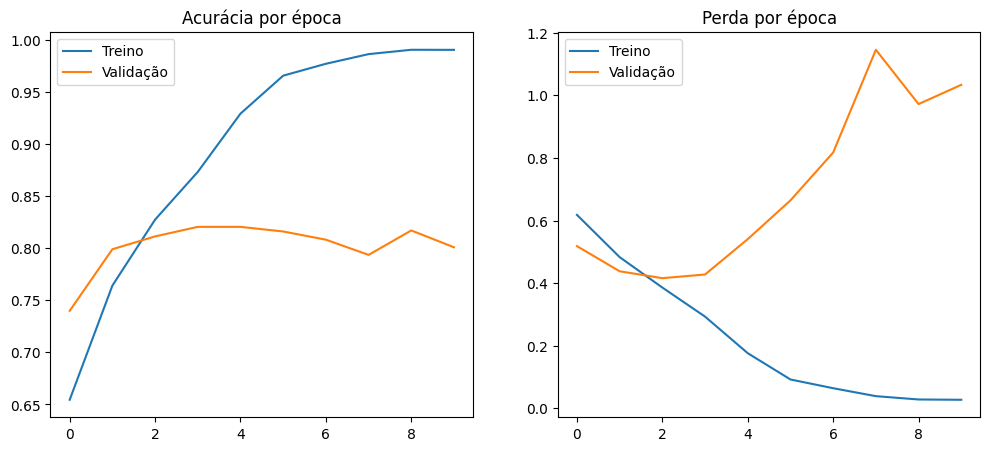

In [10]:
# 2. Construção e treinamento da CNN
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Plotando gráficos de acurácia e perda
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por época')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda por época')
plt.legend()
plt.show()

In [11]:
# 3. Avaliação e testes
# Gerando previsões no conjunto de validação
pred_probs = model.predict(val_ds)
pred_classes = (pred_probs > 0.5).astype(int)
true_labels = np.concatenate([y.numpy() for x, y in val_ds], axis=0)

print(classification_report(true_labels, pred_classes, target_names=['Gato', 'Cachorro']))

219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

        Gato       0.83      0.76      0.79      3463
    Cachorro       0.78      0.85      0.81      3516

    accuracy                           0.80      6979
   macro avg       0.80      0.80      0.80      6979
weighted avg       0.80      0.80      0.80      6979



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


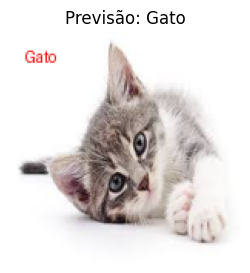

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Previsão para imagem nova: Gato (Confiança: 0.2553)


In [19]:
# 4. Teste com imagem nova
from tensorflow.keras.utils import load_img, img_to_array

test_image_path = 'test_cat-2.jpg'

# Carrega e exibe a imagem com label adicionada
img = load_img(test_image_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]
label = 'Cachorro' if prediction > 0.5 else 'Gato'
label_text = label

original_image = Image.open(test_image_path).resize((IMG_SIZE, IMG_SIZE))
draw = ImageDraw.Draw(original_image)
draw = ImageDraw.Draw(original_image)
prediction = model.predict(img_array)[0][0]
label = 'Cachorro' if prediction > 0.5 else 'Gato'
label_text = label

try:
    font = ImageFont.truetype("arial.ttf", 16)
except:
    font = ImageFont.load_default()

text_position = (10, 10)
text_color = (255, 0, 0)

draw.text(text_position, label_text, fill=text_color, font=font)

# Exibe a imagem com a label
plt.figure(figsize=(3,3))
plt.imshow(original_image)
plt.axis('off')
plt.title(f"Previsão: {label_text}")
plt.show()


prediction = model.predict(img_array)[0][0]
label = 'Cachorro' if prediction > 0.5 else 'Gato'
print(f"Previsão para imagem nova: {label_text} (Confiança: {prediction:.4f})")
